<a href="https://colab.research.google.com/github/praveentn/hgwxx7/blob/master/transferlearning/obj_detection_frcnn_resnet_detecto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install detecto

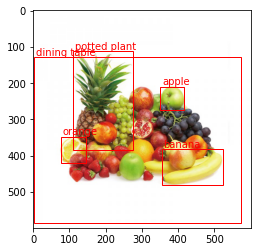

In [2]:
from detecto import core, utils, visualize

image = utils.read_image('https://www.hellocig.com/media/catalog/product/cache/1/image/600x/9df78eab33525d08d6e5fb8d27136e95/f/r/fruits_1.jpg')
model = core.Model()

labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

In [3]:
import torch

print(torch.cuda.is_available())

True


In [4]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/Detecto Tutorial')

Mounted at /content/drive


In [5]:
pwd

'/content/drive/My Drive/Detecto Tutorial'

In [6]:
!git clone https://github.com/praveentn/02085620_.git

Cloning into '02085620_'...
remote: Enumerating objects: 551, done.
remote: Counting objects: 100% (551/551), done.
remote: Compressing objects: 100% (288/288), done.
remote: Total 551 (delta 451), reused 363 (delta 263), pack-reused 0
Receiving objects: 100% (551/551), 3.60 MiB | 8.43 MiB/s, done.
Resolving deltas: 100% (451/451), done.
Checking out files: 100% (222/222), done.


In [7]:
ls

02085620_/


In [8]:
cd 02085620_

/content/drive/My Drive/Detecto Tutorial/02085620_


In [9]:
ls

images/  train_labels/  val_labels/


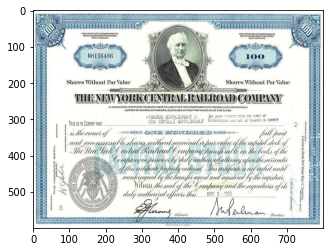

In [10]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

image = read_image('/content/drive/My Drive/Detecto Tutorial/02085620_/images/017.jpg')
plt.imshow(image)
plt.show()

In [0]:
# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/content/drive/My Drive/Detecto Tutorial/02085620_'

os.chdir(WORKING_DIRECTORY)

In [12]:
pwd

'/content/drive/My Drive/Detecto Tutorial/02085620_'

In [0]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

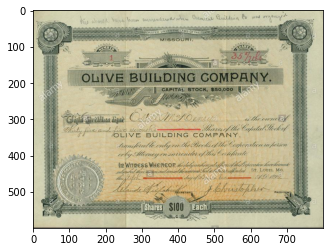

In [14]:
image = utils.read_image('images/1007.jpg')
plt.imshow(image)
plt.show()

In [15]:
# Do this twice: once for our training labels and once for our validation labels
utils.xml_to_csv('train_labels', 'train.csv')
utils.xml_to_csv('val_labels', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1001.jpg,800,600,signature,152,472,324,576
1,1001.jpg,800,600,signature,499,482,658,548
2,1001.jpg,800,600,stamp,347,453,460,582
3,1001.jpg,800,600,shares,644,150,700,172
4,1001.jpg,800,600,issuer,135,206,659,242
5,1002.jpg,800,600,issuer,172,216,630,263
6,1002.jpg,800,600,shares,597,153,635,177
7,1002.jpg,800,600,signature,179,462,304,506
8,1002.jpg,800,600,signature,475,468,638,502
9,1002.jpg,800,600,stamp,339,443,470,584


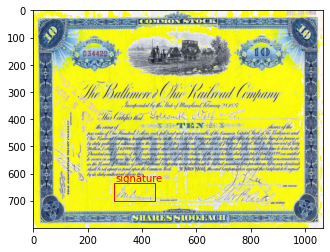

In [16]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    #transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv', 'images/', transform=transform_img)

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Epoch 1 of 10
Loss: 0.45159302143062036
Epoch 2 of 10
Loss: 0.34682326164187455
Epoch 3 of 10
Loss: 0.355261224072154
Epoch 4 of 10
Loss: 0.32960339399372657
Epoch 5 of 10
Loss: 0.32485295523230623
Epoch 6 of 10
Loss: 0.3219729711006327
Epoch 7 of 10
Loss: 0.32022666349643614
Epoch 8 of 10
Loss: 0.3182347347823585
Epoch 9 of 10
Loss: 0.3193249060976796
Epoch 10 of 10
Loss: 0.3214330638690693


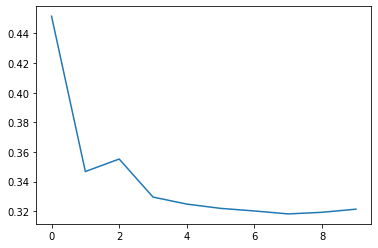

In [17]:
# Create our validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['issuer', 'shares', 'signature', 'stamp'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, learning_rate=0.001, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

In [18]:
# Specify the path to your image
image = utils.read_image('images/1002.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['alien', 'bat', 'bat']
print(labels) 

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)

['stamp', 'signature', 'stamp', 'signature', 'stamp', 'signature', 'stamp', 'signature', 'signature', 'signature', 'stamp', 'signature', 'issuer', 'stamp', 'signature', 'shares', 'signature', 'signature', 'shares', 'stamp', 'signature', 'signature', 'stamp', 'shares', 'shares', 'stamp', 'stamp', 'issuer', 'signature', 'stamp', 'stamp']
tensor([[340.0673, 440.8099, 454.5465, 571.3757],
        [191.4156, 468.6439, 289.7362, 503.5339],
        [360.9941, 465.2087, 474.0757, 598.3918],
        [182.5226, 454.3288, 254.9477, 512.5241],
        [138.9359, 148.4527, 235.1541, 177.0650],
        [138.4373, 146.2501, 227.5560, 178.6623],
        [324.7284, 466.0275, 477.2532, 544.3190],
        [476.8034, 469.0501, 595.3386, 497.4170],
        [193.1417, 227.7455, 526.6152, 262.1439],
        [325.1167, 223.9752, 675.9658, 258.0015],
        [174.9924, 464.4114, 260.2603, 505.1465],
        [481.6902, 463.7512, 661.5718, 510.4590],
        [209.7948, 226.7689, 622.5829, 254.9724],
        [470

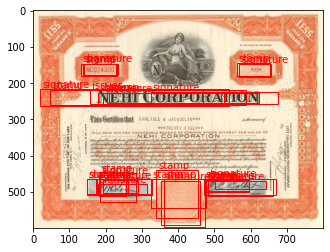

In [19]:
visualize.show_labeled_image(image, boxes, labels)